In [2]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
freq, H1_main = np.load("./data/acc_data.npy")

In [4]:
freq.shape, H1_main.shape

((9999,), (6, 7, 9999))

In [5]:
#Impact , accelerometer
FRF = H1_main[:,1,:]

freq = freq
acc = pyEMA.lscf(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

In [6]:
acc.get_poles(show_progress=True)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 154.67it/s]


In [7]:
acc.stab_chart(acc.all_poles, legend = True)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 176.96it/s]


SHIFT + LEFT mouse button to pick a pole.
RIGHT mouse button to erase the last pick.
1. Frequency: ~180 -->	176.06842580721724 Hz	(xi = 0.0087)
2. Frequency: ~471 -->	476.5143761357684 Hz	(xi = 0.0019)
3. Frequency: ~936 -->	932.2524358402845 Hz	(xi = 0.0015)
4. Frequency: ~1548 -->	1534.7745662505763 Hz	(xi = 0.0019)
5. Frequency: ~2295 -->	2286.341405130745 Hz	(xi = 0.0028)
6. Frequency: ~3176 -->	3161.8885136359136 Hz	(xi = 0.0018)


<Figure size 432x288 with 0 Axes>

In [8]:
# Alternatively the frequencies can be defines as a list, e.g.:
n_freq =  [176,476,932,1534,2258,3161,4180]
acc.select_closest_poles(n_freq)

In [9]:
# Reconstruction of FRF
frf_rec, modal_const = acc.lsfd(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [10]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0087
2)  476.2	0.0016
3)  932.4	0.0013
4) 1534.8	0.0019
5) 2285.2	0.0013
6) 3162.1	0.0024
7) 4182.0	0.0018


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [11]:
acc.A[:,:3]

array([[  -9.06629291  -46.37029907j, -145.75669051 -333.70177777j,
         -23.14907291 -161.42694803j],
       [  -3.68559468   +5.14362239j,  269.35868837 +564.82508737j,
         179.10425226+1692.00983383j],
       [   5.44448672  +33.24770051j,  212.46925477 +350.26353053j,
        -309.44258767-1158.86852629j],
       [   7.12161553  +30.8787791j , -214.01268169 -338.32006709j,
        -337.54125953-1178.37610549j],
       [  -0.49068849   +5.23727706j, -316.68624592 -488.7358078j ,
         480.79731637+1563.31113073j],
       [ -12.49477211  -34.60745649j,  160.57138504 +258.4332819j ,
         -82.84096661 -211.01883622j]])

Real part of modal constants:

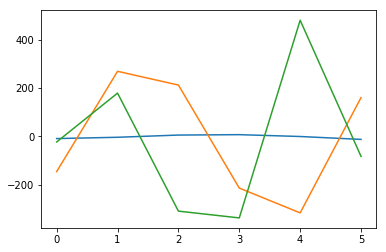

In [12]:
plt.plot(np.real(acc.A[:,:3]))

Showing the reconstructed FRF

In [13]:
FRF.shape

(6, 9999)

In [14]:
freq.shape

(9999,)

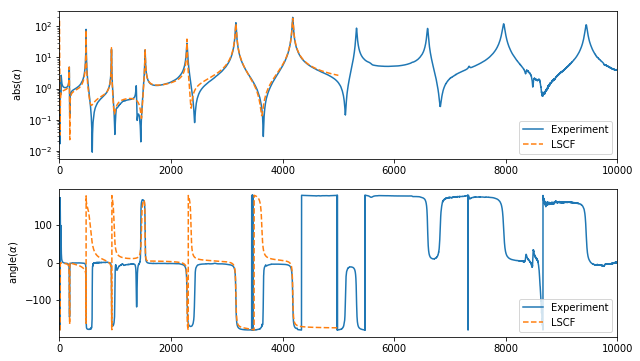

In [23]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')